In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('data/winequality-red.csv',sep=';')

In [19]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Holdout Cross-Validation Score: 0.575
K-Fold Cross-Validation Scores: [0.66015625 0.61328125 0.58203125 0.59765625 0.55686275]
Average K-Fold Score: 0.6019975490196078
Leave-One-Out Cross-Validation Score: 0.6051602814698983
Stratified K-Fold Cross-Validation Scores: [0.59375    0.59375    0.640625   0.58984375 0.60392157]
Average Stratified K-Fold Score: 0.6043780637254902


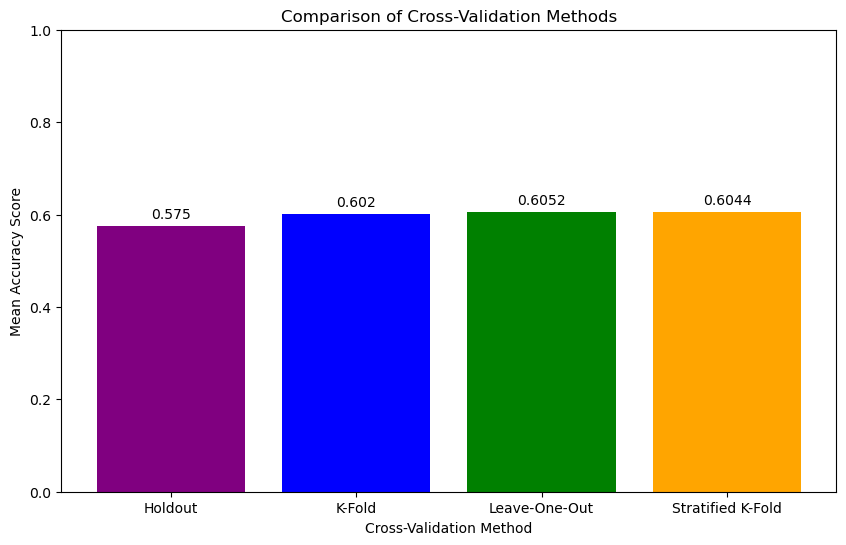

In [20]:
# Define features (X) and target (y)
X = data.drop(columns=['quality'])
y = data['quality']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the model with increased max_iter
model = LogisticRegression(max_iter=1000)

# Holdout Cross-Validation
model.fit(X_train, y_train)
holdout_preds = model.predict(X_test)
holdout_score = accuracy_score(y_test, holdout_preds)
print("Holdout Cross-Validation Score:", holdout_score)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores = cross_val_score(model, X_train, y_train, cv=kf)
kf_mean_score = kf_scores.mean()
print("K-Fold Cross-Validation Scores:", kf_scores)
print("Average K-Fold Score:", kf_mean_score)

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()
loo_scores = cross_val_score(model, X_train, y_train, cv=loo)
loo_mean_score = loo_scores.mean()
print("Leave-One-Out Cross-Validation Score:", loo_mean_score)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_scores = cross_val_score(model, X_train, y_train, cv=skf)
skf_mean_score = skf_scores.mean()
print("Stratified K-Fold Cross-Validation Scores:", skf_scores)
print("Average Stratified K-Fold Score:", skf_mean_score)

# Visualize the results
cross_val_methods = ['Holdout', 'K-Fold', 'Leave-One-Out', 'Stratified K-Fold']
mean_scores = [holdout_score, kf_mean_score, loo_mean_score, skf_mean_score]

plt.figure(figsize=(10, 6))
plt.bar(cross_val_methods, mean_scores, color=['purple', 'blue', 'green', 'orange'])
plt.xlabel('Cross-Validation Method')
plt.ylabel('Mean Accuracy Score')
plt.title('Comparison of Cross-Validation Methods')
plt.ylim(0, 1)
for i, score in enumerate(mean_scores):
    plt.text(i, score + 0.01, round(score, 4), ha='center', va='bottom')
plt.show()
